# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la $mediana$ de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [3]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
n=len(datos)

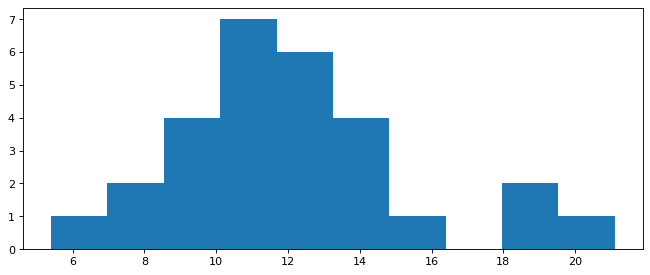

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=80)
ax.hist(datos)
plt.show()

In [126]:
#mediana del conjunto de datos inicial
m = statistics.median(datos)
print(f"Mediana del conjunto de datos inicial: {m}")

#operadores en generacion de submuestras para B
b=2500
step=15
rng1 = list(range(50,b,step))


mn = []
int_conf = []
error_var = []
mse = []
index = 0

#iterador generador de submuestras para rng1={B0,B1.....BN}
for item in rng1:
    mn=[]
    mediana = 0
    var_t = 0
    sum_mse = 0
    
    #iterador en la obtencion de muestras BN
    for j in range(item):
        dat = np.random.choice(list(datos),size=n,replace=True) #se generan las muestras de reemplazo
        mn.append(statistics.median(dat)) #se capturan las medias de cada muestra de reemplazo    
        
    #varianza empírica
    var = statistics.variance(mn)
    #estimador del intervalo de confianza
    int_conf.append(1.96*math.sqrt(var))
    
    #varianza teórica y error cuadrático medio
    mediana = sum(mn)/item
    for i in range(item):
        var_t += math.pow(mn[i]-mediana,2) #suma para varianza teórica
        sum_mse += math.pow(mn[i]-m,2) #suma de error cuadrático medio
    var_t = var_t/(item-1) #cálculo de varianza teórica
    mse.append(sum_mse/item) #cálculo de error cuadrático medio
    
    #cálculo de error en la varianza
    err = abs(var-var_t)/abs(var)
    error_var.append(err)
    
    if(err<5*math.pow(10,-16.6215) and err!=0.0):
        index = item
        break

ln = len(error_var)
print(f"Error alcanzado {error_var[ln-1]}")
print(f"Se alcanza una aproximación en {index} subparticiones")
print(f"Con varianza estimada {var_t}, y varianza teórica de {var}")
ln = len(mse)
print(f"Estimación de error medio cuadrático {mse[ln-1]}")
print(f"Su intervalo de confianza será:")
display(Math('%0.2f \pm %0.2f' % (m, 1.96*math.sqrt(var) )))

Mediana del conjunto de datos inicial: 11.649999999999999
Error alcanzado 1.1228930086419897e-16
Se alcanza una aproximación en 635 subparticiones
Con varianza estimada 0.24717916490722566, y varianza teórica de 0.24717916490722563
Estimación de error medio cuadrático 0.260169291338583
Su intervalo de confianza será:


<IPython.core.display.Math object>

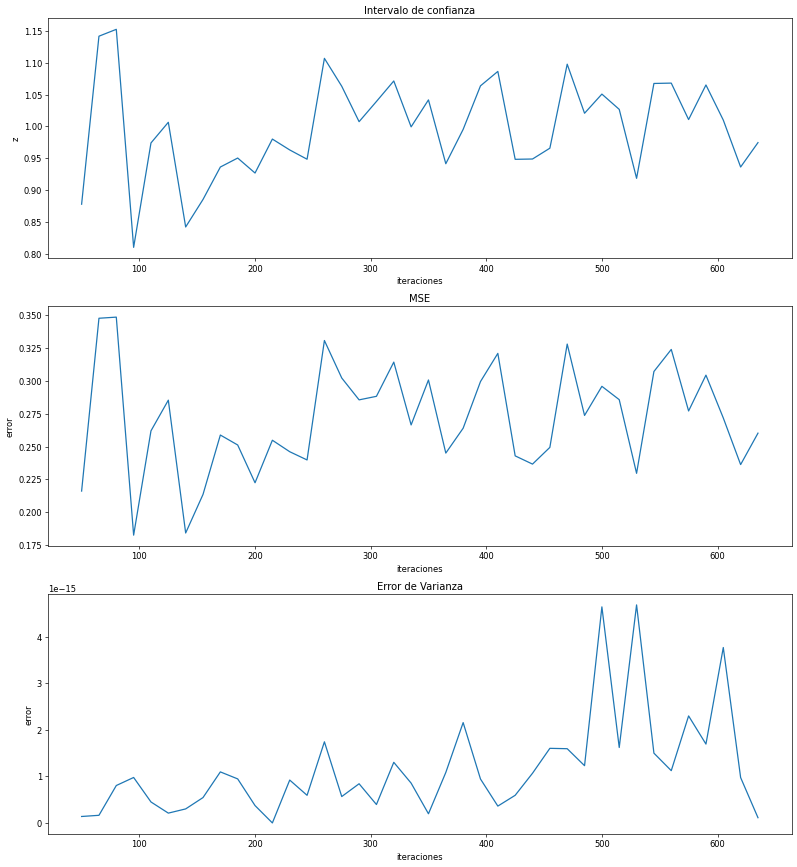

In [127]:
fig, ax = plt.subplots(3, 1, figsize=(16, 18), dpi=60)
dm = list(range(50,index+step,step))
ax[0].plot(dm,int_conf)
ax[0].set_title("Intervalo de confianza")
ax[0].set(xlabel='subparticiones', ylabel='z')

ax[1].set_title("MSE")
ax[1].set(xlabel='subparticiones', ylabel='error')
ax[1].plot(dm,mse)

ax[2].set_title("Error de Varianza")
ax[2].set(xlabel='subparticiones', ylabel='error')
ax[2].plot(dm,error_var)

plt.show()

### Cálculos de incerteza con respecto a la desviación estándar

In [112]:
m = statistics.stdev(datos)
print(f"Desviación estandar del conjunto de datos inicial: {m}")

#operadores en generacion de submuestras para B
b=2500
step=15
rng2 = list(range(50,b,step))

mn = []
int_conf_std = []
error_var_std = []
mse_std = []
index_std = 0

#iterador generador de submuestras para rng1={B0,B1.....BN}
for item in rng2:
    mn=[]
    mediana = 0
    var_t = 0
    sum_mse = 0
    
    #iterador en la obtencion de muestras BN
    for j in range(item):
        dat = np.random.choice(list(datos),size=n,replace=True) #se generan las muestras de reemplazo
        mn.append(statistics.stdev(dat)) #se capturan las medias de cada muestra de reemplazo    
        
    #varianza empírica
    var = statistics.variance(mn)
    #estimador del intervalo de confianza
    int_conf_std.append(1.96*math.sqrt(var))
    
    #varianza teórica y error cuadrático medio
    mediana = sum(mn)/item
    for i in range(item):
        var_t += math.pow(mn[i]-mediana,2) #suma para varianza teórica
        sum_mse += math.pow(mn[i]-m,2) #suma de error cuadrático medio
    var_t = var_t/(item-1) #cálculo de varianza teórica
    mse_std.append(sum_mse/item) #cálculo de error cuadrático medio
    
    #cálculo de error en la varianza
    err = abs(var-var_t)/abs(var)
    error_var_std.append(err)
    
    if(err<5*math.pow(10,-16.4534) and err!=0.0):
        index_std = item
        break

ln = len(error_var_std)
print(f"Error alcanzado {error_var_std[ln-1]}")
print(f"Se alcanza una aproximación en {index_std} subparticiones")
print(f"Con varianza estimada {var_t}, y varianza teórica de {var}")
ln = len(mse_std)
print(f"Estimación de error medio cuadrático {mse_std[ln-1]}")
print(f"Su intervalo de confianza será:")
display(Math('%0.2f \pm %0.2f' % (m, 1.96*math.sqrt(var) )))

Desviación estandar del conjunto de datos inicial: 3.401810520122309
Error alcanzado 1.1287542292294399e-16
Se alcanza una aproximación en 725 subparticiones
Con varianza estimada 0.2458956511248392, y varianza teórica de 0.24589565112483922
Estimación de error medio cuadrático 0.25552655184839346
Su intervalo de confianza será:


<IPython.core.display.Math object>

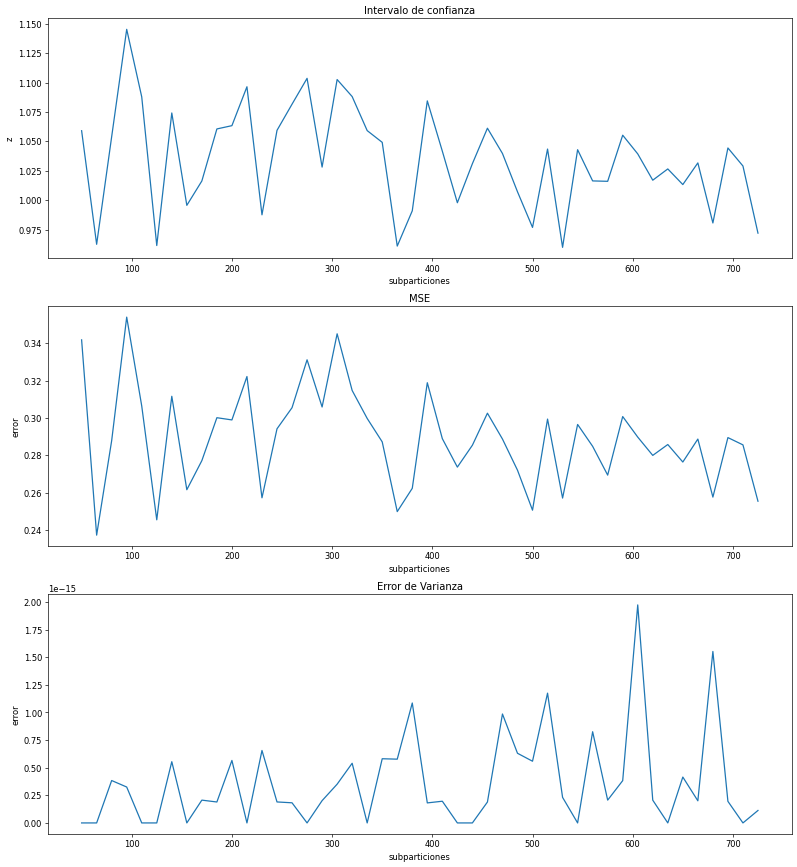

In [128]:
fig, ax = plt.subplots(3, 1, figsize=(16, 18), dpi=60)
dm = list(range(50,index_std+step,step))
ax[0].plot(dm,int_conf_std)
ax[0].set_title("Intervalo de confianza")
ax[0].set(xlabel='subparticiones', ylabel='z')

ax[1].set_title("MSE")
ax[1].set(xlabel='subparticiones', ylabel='error')
ax[1].plot(dm,mse_std)

ax[2].set_title("Error de Varianza")
ax[2].set(xlabel='subparticiones', ylabel='error')
ax[2].plot(dm,error_var_std)

plt.show()

## Comentarios

    Se puede notar que los estadígragos son consistentes en cuanto a sus intervalos de confianza, donde sus variaciones son muy bajas con respecto a los datos.
    
    Se menciona que la cantidad de iteraciones efectuadas influye en el cálculo de la varianza estimada, dando una semejanza en términos muy cercanos a los valores respectivos de cada estadígrafo. A través de las gráficas, los intervalos de confianza y las MSE, presentan irregularidades en cuanto a su convergencia antes de las 500 iteraciones, presentando estabilidad después de los 600. 
    
    Al revisar la media, llegando a las 635 subparticiones se logra una varianza empírica y teórica con valores casi cerrados. Por otro lado la MSE se acerca bastante a las estimaciones de varianza empírica y teórica por un par de unidades de presición, luego de comprender que su relación está concentrada en calcular los errores con respecto a los datos originales, en comparación de la varianza estimada cual desarrollo es a través del cálculo de errores sobre particiones de datos estimados. En cuanto a la convergencia usando cálculo de errores relativos absolutos de la varianza, a partir de las 500 subparticiones los valores se hacen tan pequeños que produce inestabilidades para búsquedas precisas, aún así logrando algún ponderador que permita una cierta convergencia.
    
    Realizando cálculos con respecto a la desviación estandar, se logran resultados muy cercanos a la varianza en una cantidad de 725 subparticiones, con precisiones detalladas por parte de las varianzas en valores milésimos, y en cuanto al MSE, presenta un ajuste de menor cantidad en una[um] con respecto a la la varianza. Para el cálculo de errores relativos absoltos de la desviación estandar, a partir de las 600 subparticiones, la escala de datos es más sensible frente a la búsqueda de convergencia.
    
    En cuanto a sus intervalos de confianza por c/u, podemos decir que su variación comienza a estabilizarse a partir de las 600 subparticiones en un valor cercano a 1, por lo que los datos son consistentes cuando se trata de llevar ajustes de sub muestreo.

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia en cada caso.
3. Compare y comente sus resultados.

